In [159]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
np.set_printoptions(suppress=True)

# data_dir = '../data/_datasets/'
# data_file = 'seq_dg_mut_final_230629.tsv'
# data_file = os.path.join(data_dir, data_file)
# df = pd.read_csv(data_file, sep='\t')
# print(len(df))
# df.head(3)

data_dir = '../data/_datasets/'
data_file = 'seq_dg_wt_final_230629.tsv'
data_file = os.path.join(data_dir, data_file)
wt_df = pd.read_csv(data_file, sep='\t')
print(len(wt_df))
wt_df.head(3)


4846


,UniProt,protein_index,na_index,mutation_type,protein_mutation,protein_sequence,nucleotide_sequence,nucleic_acid_type_new,dG,newnafea_na_job,na_jobid,protein_na_pair_index,complex_id
0,P04150,protein_6,ssDNA0,WILD,WILD,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,ssDNA,-8.79,new_DNA_0,DNA_0022,protein_6_ssDNA0,0
1,P27694,protein_12,ssDNA1,WILD,WILD,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,ssDNA,-7.83,new_DNA_1,DNA_0225,protein_12_ssDNA1,1
2,P27694,protein_12,ssDNA2,WILD,WILD,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,ssDNA,-7.99,new_DNA_2,DNA_0226,protein_12_ssDNA2,2


In [7]:
#### load main dataset

data_dir = '../data/_datasets/'
data_file = 'seq_dg_cluster_final_230607_v2.csv'
data_file = os.path.join(data_dir, data_file)
main_df = pd.read_csv(data_file, sep='\t')
main_df.head(3)

<ipython-input-7-97644075a94b>:4: DtypeWarning: Columns (8,11,13,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv(data_file, sep='\t')


,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [ ]:
#### to check if dataset is valid

for i in range(len(wt_df)):
    cid = wt_df.loc[i]['complex_id']
    # wt_df.loc[i]['protein_sequence']
    # wt_df.loc[i]['nucleotide_sequence']
    m_row = main_df.loc[main_df['complex_id'] == cid].iloc[0]
    if m_row['protein_sequence'] != wt_df.loc[i]['protein_sequence'] \
        or m_row['nucleotide_sequence'] != wt_df.loc[i]['nucleotide_sequence']:
        print(cid)

In [66]:
list_rows = []
for i in range(len(wt_df)):
    cid = wt_df.loc[i]['complex_id']
    row_df = main_df.loc[main_df['complex_id'] == cid]
    list_rows.append(row_df)
new_df = pd.concat(list_rows, ignore_index=True)

data_dir = '../data/_datasets/'
data_file = 'wt_complext.csv'
data_file = os.path.join(data_dir, data_file)
# new_df.to_csv(data_file, index=False, sep='\t')

new_wt_df = pd.read_csv(data_file, sep='\t')
new_wt_df

,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226
3,3,pnat_14707,Q8RNV8,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,CGCACGACTTCCCGGAAGAGCACGC,wild,DNA,ssDNA,5e-10,-12.69,...,Cluster_1010,1,ssDNA3,protein_13_ssDNA3,"protein_13_ssDNA3,protein_107_ssDNA3,protein_1...",7,cluster_pair_2,pnat_14707_3imb_protein_13,Brevibacillus centrosporus,DNA_0227
4,4,pnat_14714,Q8RNV8,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,CGCACGACTTCCTGGAAGAGCACGC,wild,DNA,ssDNA,5e-10,-12.69,...,Cluster_1011,1,ssDNA4,protein_13_ssDNA4,"protein_13_ssDNA4,protein_107_ssDNA4,protein_1...",7,cluster_pair_3,pnat_14714_3imb_protein_13,Brevibacillus centrosporus,DNA_0228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,4466,pronab_19137,Q12158,MVTENPQRLTVLRLATNKGPLAQIWLASNMSNIPRGSVIQTHIAES...,TGGAAGCCTTTTCAAGGAAACGAAAGTGAACT,"K363E, R364E",DNA,ssDNA,1.9e-06,-7.80,...,Cluster_1266,1,ssDNA274,protein_2998_ssDNA274,protein_2998_ssDNA274,1,cluster_pair_1614,pronab_19137_NONE_protein_2998,Saccharomyces cerevisiae,DNA_0513
4842,10518,pronab_2121,P01100,MMFSGFNADYEASSSRCSSASPAGDSLSYYHSPADSFSSMGSPVNA...,CGCGTGACTCACCCC|GGGGTGAGTCACGCG,K153A,DNA,dsDNA,2.6e-07,-8.98,...,"Cluster_2239,Cluster_2240",1,dsDNA296,protein_797_dsDNA296,"protein_797_dsDNA296,protein_799_dsDNA296,prot...",8,cluster_pair_2882,pronab_2121_1fos_protein_797,-,"DNA_0907,DNA_0908"
4843,10639,pronab_15718,Q15583,MVLAQSRVSAGVGSPHCSGSGGGGSDSFPWPASHPGNPQCSFSTAF...,ATTGACAGCTGTCAAT|ATTGACAGCTGTCAAT,"R167A, R168A",DNA,dsDNA,3.89e-07,-8.59,...,"Cluster_2271,Cluster_2271",1,dsDNA312,protein_1055_dsDNA312,protein_1055_dsDNA312,1,cluster_pair_2899,pronab_15718_6fqq_protein_1055,Homo sapiens,"DNA_0941,DNA_0941"
4844,14698,pronab_16800,P53762,MAATTANPEMTSDVPSLGPTIASGNPGPGIQGGGAVVQRAIKRRSG...,GGCTGCGTACGTGCGGGTCGT|ACGACCCGCACGTACGCAGCC,H94A,DNA,dsDNA,1.1e-07,-9.49,...,"Cluster_1002,Cluster_1003",1,dsDNA225,protein_2965_dsDNA225,"protein_2965_dsDNA225,protein_2966_dsDNA225,pr...",4,cluster_pair_4237,pronab_16800_NONE_protein_2965,Mus musculus,"DNA_0265,DNA_0768"


In [108]:
all_lens = []
for i in range(len(new_wt_df)):
    prot_seq = new_wt_df.loc[i]['protein_sequence']
    all_lens.append(len(prot_seq))
all_lens = np.array(all_lens)
all_lens.max()

1922

In [118]:
data_dir = '../data/_datasets/'
data_file = 'wt_complext.csv'
data_file = os.path.join(data_dir, data_file)
# new_df.to_csv(data_file, index=False, sep='\t')

new_wt_df = pd.read_csv(data_file, sep='\t')
len_data = len(new_wt_df)

shuf_ids = np.random.permutation(len_data)
num_train = np.floor(0.8 * len_data).astype(np.int32)
num_test = len_data - num_train
print("train size = {}, test size = {}".format(num_train, num_test))


NUM_CV = 5

list_test_indices = []
list_train_indices = []

for i in range(NUM_CV):
    mask = np.zeros_like(shuf_ids).astype(np.bool_)
    ibeg = i * num_test
    iend = min( (i+1) * num_test, len_data)
    print("mark test set from index {} to index {}".format(ibeg, iend))
    
    mask[ibeg : iend] = True
    inv_mask = np.invert(mask)
    
    test_shf_ids = shuf_ids[mask]
    train_shf_ids = shuf_ids[inv_mask]
    
    print("train size = {}, test size = {}".format(len(train_shf_ids), len(test_shf_ids)))
    
    list_test_indices.append(test_shf_ids)
    list_train_indices.append(train_shf_ids)


def create_dir(path):
    if not os.path.exists(path):
        print("to create path, {}".format(path))
        os.makedirs(path)
    else:
        print("already existed path, {}".format(path))

cv5_data_dir = '../data/cv5_data/'

for i in range(NUM_CV):
    cv5_sub_dir = 'cv{}'.format(i)
    cv5_train_dir = os.path.join(cv5_data_dir, cv5_sub_dir, 'train')
    cv5_test_dir = os.path.join(cv5_data_dir, cv5_sub_dir, 'test')
    create_dir(cv5_train_dir)
    create_dir(cv5_test_dir)
    
    test_inds, train_inds = list_test_indices[i], list_train_indices[i]
    
    temp_test_df = new_wt_df.loc[test_inds]
    temp_train_df = new_wt_df.loc[train_inds]  
    print("train size = {}, test size = {}".format(len(temp_train_df), len(temp_test_df)))
    
    test_fpath = os.path.join(cv5_test_dir, 'data.csv')
    train_fpath = os.path.join(cv5_train_dir, 'data.csv')
    
    temp_test_df.to_csv(test_fpath, index=False, sep='\t')
    temp_train_df.to_csv(train_fpath, index=False, sep='\t')

    

train size = 3876, test size = 970
mark test set from index 0 to index 970
train size = 3876, test size = 970
mark test set from index 970 to index 1940
train size = 3876, test size = 970
mark test set from index 1940 to index 2910
train size = 3876, test size = 970
mark test set from index 2910 to index 3880
train size = 3876, test size = 970
mark test set from index 3880 to index 4846
train size = 3880, test size = 966
to create path, ../data/cv5_data/cv0/train
to create path, ../data/cv5_data/cv0/test
train size = 3876, test size = 970
to create path, ../data/cv5_data/cv1/train
to create path, ../data/cv5_data/cv1/test
train size = 3876, test size = 970
to create path, ../data/cv5_data/cv2/train
to create path, ../data/cv5_data/cv2/test
train size = 3876, test size = 970
to create path, ../data/cv5_data/cv3/train
to create path, ../data/cv5_data/cv3/test
train size = 3876, test size = 970
to create path, ../data/cv5_data/cv4/train
to create path, ../data/cv5_data/cv4/test
train size

In [51]:
import pandas as pd
import os
import numpy as np
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
import sys
np.set_printoptions(threshold=sys.maxsize)

data_root = '../data/tmp_data/mid01'
train_fpath = os.path.join(data_root, 'train', 'train.csv')
test_fpath = os.path.join(data_root, 'val', 'test.csv')


###

train_df = pd.read_csv(train_fpath, sep='\t')
print(len(train_df))
labels = train_df['dG'].values

intervals = np.arange(0, -30, -2).astype(np.float32)
inds_groups = []
for i in range(intervals.shape[0]-1):
    m = np.logical_and(labels <= intervals[i], labels > intervals[i+1])
    inds = np.where(m)[0]
    print(intervals[i], intervals[i+1], len(inds))
    inds_groups.append(inds)

test_df = pd.read_csv(test_fpath, sep='\t')
print(len(test_df))
labels = test_df['dG'].values

test_inds_groups = []
for i in range(intervals.shape[0]-1):
    m = np.logical_and(labels > intervals[i], labels <= intervals[i+1])
    inds = np.where(m)[0]

    test_inds_groups.append(inds)

5180
0.0 -2.0 26
-2.0 -4.0 24
-4.0 -6.0 233
-6.0 -8.0 807
-8.0 -10.0 1810
-10.0 -12.0 1602
-12.0 -14.0 503
-14.0 -16.0 148
-16.0 -18.0 25
-18.0 -20.0 0
-20.0 -22.0 1
-22.0 -24.0 0
-24.0 -26.0 1
-26.0 -28.0 0
3638


In [58]:
import torch
seed = 1
g = torch.Generator()
g.manual_seed(seed)
print(seed)

1


In [61]:
g = torch.Generator()
g.manual_seed(seed)
print(seed)

1


<Axes: >

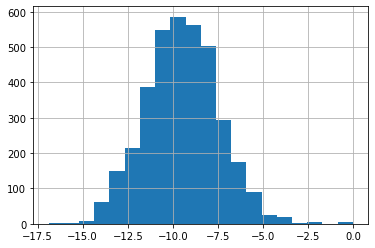

In [42]:
test_df['dG'].hist(bins=20)

In [39]:
repeat_thresh = 0.5
category_freq = np.array([233,  807, 1810, 1602,  503,  148,   25])
category_freq = category_freq/category_freq.sum()
category_freq = {i:x for i, x in enumerate(category_freq)}
category_rep = {
            cat_id: max(1.0, math.sqrt(repeat_thresh / cat_freq))
            for cat_id, cat_freq in category_freq.items()
        }
category_rep

{0: 3.3172717473088578,
 1: 1.7824700570660508,
 2: 1.1901993890249478,
 3: 1.2651084442767246,
 4: 2.2577456692369604,
 5: 4.162249911324922,
 6: 10.12719112093773}

In [45]:
train_dist = np.array([len(x) for x in inds_groups])
test_dist = np.array([len(x) for x in test_inds_groups])

# train_dist = train_dist / np.sum(train_dist)
# test_dist = test_dist / np.sum(test_dist)
train_dist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
intervals = np.array([-6.,  -8., -10., -12., -14., -16., -18.], dtype=np.float32)
inds_groups = []
def get_bin_id(intervals, label):
  other_ind = len(intervals[:-1])
  found = False
  for ind, pair in enumerate(zip(intervals[:-1], intervals[1:])):
    i, j = pair
    if label <= i and label > j:
      found = True
      return ind
  if not found:
    return other_ind

In [36]:
print(get_bin_id(intervals, -5.5))
print(get_bin_id(intervals, -6.5))
print(get_bin_id(intervals, -8.5))
print(get_bin_id(intervals, -10.5))
print(get_bin_id(intervals, -12.5))
print(get_bin_id(intervals, -14.5))
print(get_bin_id(intervals, -16.5))
print(get_bin_id(intervals, -18.5))

6
0
1
2
3
4
5
6


In [22]:
# 1810/train_dist
7.76, 2.24, 1., 1.13, 3.6, 12.23,

(7.76, 2.24, 1.0, 1.13, 3.6, 12.23)

In [46]:
import itertools
import math


train_dist2 = train_dist[3:10]
train_freqs = train_dist2 / train_dist2.sum()
print(train_freqs)
repeat_thresh = 0.5
category_rep = {
            cat_id: max(1.0, math.sqrt(repeat_thresh / cat_freq))
            for cat_id, cat_freq in enumerate(train_freqs)
        }
print(category_rep)

[nan nan nan nan nan nan nan]
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}


<ipython-input-46-8b29a7589f38>:6: RuntimeWarning: invalid value encountered in divide
  train_freqs = train_dist2 / train_dist2.sum()


In [ ]:
# -6.,  -8., -10., -12., -14., -16., -18.
#     

In [16]:
intervals 

array([  0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14., -16., -18., -20.,
       -22., -24., -26., -28.], dtype=float32)

In [17]:
test_dist

array([   0,    5,   12,  138,  694, 1306, 1089,  345,   46,    3,    0,
          0,    0,    0])

In [20]:
np.array([int(len(x)*(3638 / 5180.)) for x in inds_groups])

array([   0,   18,   16,  163,  566, 1271, 1125,  353,  103,   17,    0,
          0,    0,    0])

In [146]:
info = {'loss': 1.1, 'rvalue': 0.2, 'pvalue': 22, 'rrmse': 3.0}
# np.savez('test{:.3f}'.format(0.3124231523452345), info=info)
np.savez('test', info=info)
d = np.load('test.npz', allow_pickle=True)
d['info']

array({'loss': 1.1, 'rvalue': 0.2, 'pvalue': 22, 'rrmse': 3.0},
      dtype=object)